In [1]:
# Importer les bibliothèques nécessaires
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Charger le modèle
model = load_model('../model/model_final.h5')

In [3]:
# Générer les données de test
datagen = ImageDataGenerator()
test_folder_path = "../data/test"

test_generator = datagen.flow_from_directory(test_folder_path,
                                             target_size=(229, 229),
                                             batch_size=32,
                                             shuffle=False)

Found 1288 images belonging to 3 classes.


In [4]:
# Prédictions
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes

c:\Users\heses\OneDrive\Documents\Deep_Learning\env\deep_learning\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step


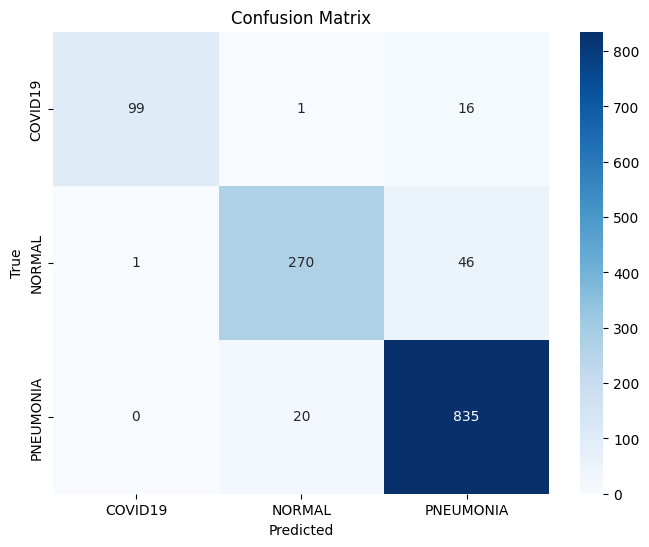

In [5]:
# Matrice de confusion
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [6]:
# Rapport de classification
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys()))

Classification Report:
               precision    recall  f1-score   support

     COVID19       0.99      0.85      0.92       116
      NORMAL       0.93      0.85      0.89       317
   PNEUMONIA       0.93      0.98      0.95       855

    accuracy                           0.93      1288
   macro avg       0.95      0.89      0.92      1288
weighted avg       0.94      0.93      0.93      1288

